In [ ]:
pip install ucimlrepo

In [ ]:
# Importar librerias
from ucimlrepo import fetch_ucirepo
import tensorflow as tf
from tensorflow.keras import models, layers, Input, regularizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Obtener conjunto de datos
tic_tac_toe_endgame = fetch_ucirepo(id=101)
X = tic_tac_toe_endgame.data.features
y = tic_tac_toe_endgame.data.targets

Esta base de datos codifica el conjunto completo de posibles configuraciones del tablero al final de los juegos de tres en raya, donde se supone que "x" jugó primero. El concepto objetivo es "ganar para x" (es decir, es cierto cuando "x" tiene una de las 8 formas posibles de crear un "tres en raya").

In [ ]:
# Preprocesar las etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.ravel())

# Convertir las características categóricas a numéricas
X = X.apply(lambda col: LabelEncoder().fit_transform(col))

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cambiar la forma de los datos para que sean compatibles con la CNN
# Cada fila de X tiene 9 características que corresponden a las 9 casillas del tablero
X_train = X_train.values.reshape(-1, 3, 3, 1)
X_test = X_test.values.reshape(-1, 3, 3, 1)

In [ ]:
# Modelo
model = models.Sequential([
  Input(shape=(3, 3, 1)),
  layers.Conv2D(32, (2, 2), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Regularización L2
  layers.Dropout(0.5),  # Dropout para evitar el sobreajuste
  layers.Dense(1, activation='sigmoid')  # Activación sigmoide para salida binaria
])

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test))

Epoch 1/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5103 - loss: 1.1711 - val_accuracy: 0.6510 - val_loss: 1.0324
Epoch 2/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6383 - loss: 1.0071 - val_accuracy: 0.6510 - val_loss: 0.9303
Epoch 3/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6536 - loss: 0.9042 - val_accuracy: 0.6510 - val_loss: 0.8562
Epoch 4/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6797 - loss: 0.8281 - val_accuracy: 0.6510 - val_loss: 0.8020
Epoch 5/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6427 - loss: 0.7974 - val_accuracy: 0.6510 - val_loss: 0.7630
Epoch 6/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6403 - loss: 0.7556 - val_accuracy: 0.6510 - val_loss: 0.7351
Epoch 7/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6814 - loss: 0.7106 - val_accuracy: 0.6510 - val_loss: 0.7138
Epoch 8/80
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6360 - loss: 0.7192 - val_accuracy: 0.6510 - val_loss

In [ ]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

6/6 - 0s - 5ms/step - accuracy: 0.7188 - loss: 0.5827

Test accuracy: 0.71875


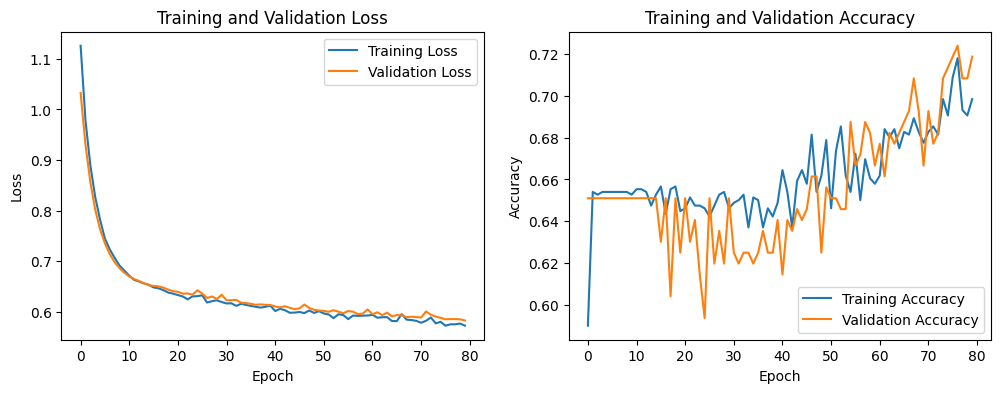

In [ ]:
# Graficar las curvas de pérdida y precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

**Conclusiones Generales:**

* **Mejora en la generalización:** Las pérdidas de entrenamiento y validación convergen y disminuyen, lo que sugiere que el modelo generaliza bien sin sobreajuste significativo.
* **Estabilidad y mejora en precisión:** La precisión en el conjunto de validación sigue una tendencia general ascendente y se estabiliza hacia el final, mostrando mejoras en el desempeño general del modelo.


In [ ]:
# Guardar el modelo
model.save('tic_tac_toe_cnn_model.h5')
print("Modelo guardado como 'tic_tac_toe_cnn_model.h5'")